# Chapter 11. 모델 평가

## 11.1 교차검증 모델 만들기

In [6]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# 숫자 데이터셋 로드
digits = datasets.load_digits()

# 특성 행렬을 제작
features = digits.data

# 타깃 벡터 제작
target = digits.target

# 표준화 객체 제작
standardizer = StandardScaler()

# 로지스틱 회귀 객체 제작
logit = LogisticRegression()

# 표준화 후에 로지스틱을 회귀 실행하는 파이프라인 제작
pipeline = make_pipeline(standardizer, logit)

# K-폴드 교차검증 제작
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# k 폴드 교차검증 수행
cv_results = cross_val_score(pipeline,
                            features,
                            target,
                            cv=kf,
                            scoring="accuracy",
                            n_jobs=-1)

In [7]:
cv_results.mean()

0.9693916821849783

In [8]:
cv_results

array([0.97777778, 0.98888889, 0.96111111, 0.94444444, 0.97777778,
       0.98333333, 0.95555556, 0.98882682, 0.97765363, 0.93854749])

* KFCV : 데이터를 폴드라 부르는 k 개 부분으로 나눈다.
    * k-1개 폴드를 하나의 훈련 세트로 합쳐 모델 훈련 후 남은 폴드를 테스트 세트로 사용한다.
    * k번 반복한다. 반복해서 얻은 모델 성능을 평균하여 최종 성능을 산출한다.

* 데이터가 IID면 폴드로 분할하기 전에 shuffle=True 해주는 것이 좋습니다.

In [10]:
# 라이브러리 임포트
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트 제작
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.1, random_state=1
)

# 훈련 세트로 standardizer의 fit 메서드 호출
standardizer.fit(features_train)

# 훈련 세트와 테스트 세트 모두 적용
features_train_std = standardizer.transform(features_train)
features_test_std = standardizer.transform(features_test)

* 테스트 세트를 모르는 척하기 위해서 이런 짓을 한다.
    * 이 전처리 객체를 모든 샘플로하면 테스트 세트의 정보가 훈련 세트로 유출된 것이다.
    * 이 규칙을 사이킷런의 pipeline 패키지를 활용하면 교차검증 기법을 사용할 때 유용하다.
        * 전처리(standardizer) 후 로지스틱 회귀에 적합(logit)할 수 있다.

In [11]:
# 파이프라인
pipeline = make_pipeline(standardizer, logit)

# k-폴드 교차검증 수행
cv_results = cross_val_score(pipeline,
features,
target,
cv=kf,
scoring="accuracy",
n_jobs=-1)

In [12]:
cv_results.mean()

0.9693916821849783

In [13]:
cv_results

array([0.97777778, 0.98888889, 0.96111111, 0.94444444, 0.97777778,
       0.98333333, 0.95555556, 0.98882682, 0.97765363, 0.93854749])

* ShuffleSplit : 반복 횟수에 상관없이 훈련 폴드와 테스트 폴드 크기를 임의 지정 가능하다.
    * train_size, test_size : 사용할 샘플 개수 또는 비율을 입력한다.
    * 반복마다 랜덤하게 분할하므로, 하나의 샘플이 여러 테스트 폴드에 존재할 수 있다.
    * StratifiedShuffleSplit : 계층별 교차검증

In [15]:
from sklearn.model_selection import ShuffleSplit

# shufflesplit 분할기 제작
ss = ShuffleSplit(n_splits=10, train_size=0.5, test_size=0.2, random_state=42)

# 교차 검증 수행
cv_results_ss = cross_val_score(pipeline,
features,
target,
cv=ss, # 교차 검증기법에 kf가 아니라 ShuffleSplit로 바로 해결할 수 있다.
scoring="accuracy",
n_jobs=-1)

In [16]:
# 사이킷런 0.19 > : 교차검증을 반복 실행 가능한 RepeatedKFold, StratifiedRepeatedKFold 수행
from sklearn.model_selection import RepeatedKFold

# RepeatedKFold 분할기 제작
rfk = RepeatedKFold(n_splits=10, n_repeats=5, random_state=42)

# 교차검증을 수행 : 10-폴드 교차검증을 5번 반복
cv_results_rfk = cross_val_score(pipeline,
features,
target,
cv=rfk,
scoring="accuracy",
n_jobs=-1)

In [20]:
cv_results_rfk.mean()

0.9695065176908755

In [22]:
len(cv_results_rfk)

50

* 검증 개수가 총 10폴드 * 5번 반복해서 50번임을 알 수 있다.

## 11.2 기본 회귀 모델 만들기

* 사이킷런의 DummyRegressor 활용하여 기본 모델로 사용할 간단한 더미(dummy) 모델 제작

In [28]:
from sklearn.datasets import load_boston
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

# 데이터 로드
boston = load_boston()

# 특성 제작
features, target = boston.data, boston.target

# 훈련 세트, 테스트 세트 분리
features_train, features_test, target_train, target_test = train_test_split(
    features, target, random_state=0)

# 더미 회귀 모델 제작
dummy = DummyRegressor(strategy='mean')

# 더미 회귀 모델 훈련
dummy.fit(features_train, target_train)

# R2 점수 계산
dummy.score(features_test, target_test)

-0.001119359203955339

In [30]:
#  다른 모델 훈련 및 평가
from sklearn.linear_model import LinearRegression

# 단순 선형 회귀 모델 제작
ols = LinearRegression()
ols.fit(features_train, target_train)

# R2점수 계산
ols.score(features_test, target_test)

0.6354638433202129

* DummyRegressor : strategy 파라미터로 예측 방법 지정할 수 있다.(훈련 세트의 평균 혹은 중간값, 혹은 constant로 일정한 값으로 예측 가능)

In [31]:
# 모든 샘플을 20으로 예측
clf = DummyRegressor(strategy='constant', constant=20)
clf.fit(features_train, target_train)

# R2 점수
clf.score(features_test, target_test)

-0.06510502029325727

* 기본적으로 score 메서드 : 결정계수 값을 반환한다.
    * $R^2$ 으로 표기하며, 1에 가까울수록 특성이 타깃 벡터의 분산을 잘 설명한다.

In [38]:
clf = DummyRegressor(strategy='quantile', quantile=1.0) # quantile 파라미터에 지정한 분위값을 예측 사용한다.
clf.fit(features_train, target_train)

f = DummyRegressor(strategy='quantile', quantile=1.0) # quantile 파라미터에 지정한 분위값을 예측 사용한다.
clf.fit(features_train, target_train)

# 훈련 세트의 타깃의 최대값으로 예측
clf.predict(features_test)

array([50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50.])

In [40]:
import numpy as np
# 훈련 세트의 타깃에서 최댓값 확인
np.max(target_train)

50.0

## 11.3 기본 분류 모델 만들기

In [43]:
# 사이킷런의 더미클래시파이어 활용
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

# 데이터 로드
iris = load_iris()

# 타깃 벡터와 특성 행렬 제작
features, target = iris.data, iris.target

# 훈련 세트와 테스트 세트로 나눈다.
features_train, features_test, target_train, target_test = train_test_split(
    features, target, random_state=0)

# 더미 분류 모델 제작
dummy = DummyClassifier(strategy='uniform', random_state=1)

# 모델 훈련
dummy.fit(features_train, target_train)

# 정확도 점수 계산
dummy.score(features_test, target_test)

0.42105263157894735

In [44]:
# 다른 모델과 기본 모델을 비교한다.cross_val_score
from sklearn.ensemble import RandomForestClassifier

# 분류 모델 제작
classifier = RandomForestClassifier()

# 모델 훈련
classifier.fit(features_train, target_train)

# 점수 계산
classifier.score(features_test, target_test)

0.9736842105263158

In [45]:
# dummyclassifier의 strategy, stratified / uniform
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(features_train, target_train)

# 가장 많은 값 예측
dummy.predict(features_test)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [47]:
# 실제로 많은지 확인
np.bincount(target_train)

array([37, 34, 41], dtype=int64)

* 실제로 레이블 0, 1, 2 중에 2가 제일 많음을 알 수 있다.

## 11.4 이진 분류기 예측 평가

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# 특성 행렬과 타깃 벡터 제작
X, y = make_classification(
    n_samples=10000, 
    n_features=3,
    n_informative=3,
    n_redundant=0,
    n_classes=2,
    random_state=1
)

# 로지스틱 회귀 모델 제작
logit =LogisticRegression()

# 정확도 사용하여 교차검증 수행
cross_val_score(logit, X, y, scoring="accuracy")

array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ])

In [51]:
# 정밀도 사용한 교차검증
cross_val_score(logit, X, y , scoring="precision")

array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])

In [52]:
# 재현율 교차검증
# 높은 재현율 모델 : 샘플을 양성 클래스로 예츠갛고자 낮은 기준을 갖게 한다.
cross_val_score(logit, X, y, scoring="recall")

array([0.951, 0.952, 0.953, 0.949, 0.951])

In [53]:
# f1 점수 : 정밀도와 재현율의 조화평균
# f1 점수를 사용한 교차검증
cross_val_score(logit, X, y, scoring="f1")

array([0.95529884, 0.9500998 , 0.95827049, 0.95520886, 0.95577889])

In [56]:
# 실제 y값과 예측한 y 값이 있다면 정확도를 계산할 수 있다. cross_val_score가 아니라 직접 분할

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=1
)

# 테스트 세트의 예측 제작
y_hat = logit.fit(X_train, y_train).predict(X_test)

# 정확도 계산
accuracy_score(y_test, y_hat)

0.947

In [57]:
# cross_validate 함수 추가
# scoring 변수에 리스트 형태로 여러가지 평가 지표를 넣어볼 수 있다.
from sklearn.model_selection import cross_validate

# 정확도와 정밀도 사용한 교차검증
cross_validate(logit, X, y, scoring=["accuracy", "precision","recall","f1"])

{'fit_time': array([0.00895095, 0.00598454, 0.00698113, 0.00598407, 0.00698113]),
 'score_time': array([0.00398874, 0.0029912 , 0.00299239, 0.00299215, 0.00299144]),
 'test_accuracy': array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ]),
 'test_precision': array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606]),
 'test_recall': array([0.951, 0.952, 0.953, 0.949, 0.951]),
 'test_f1': array([0.95529884, 0.9500998 , 0.95827049, 0.95520886, 0.95577889])}

## 11.5 이진 분류기 임계값 평가하기

* ROC 곡선 : 이진 분류기의 품질을 평가하는 데 널리 사용하는 방법
* ROC : 확률 임계값(특정 샘플을 한 클래스로 예측할 확률)마다 실제 양성과 거짓 양성 개수 비교한다.

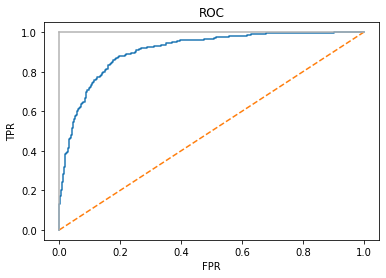

In [59]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

# 특성 행렬과 타깃 벡터 제작
features, target = make_classification(
    n_samples=10000,
    n_features=10,
    n_classes=2,
    n_informative=3,
    random_state=3)

# 훈련 세트와 테스트 세트 분할
features_train, features_test, target_train, target_test = train_test_split(
    features,
    target,
    test_size = 0.1,
    random_state=1
)

# 분류기 제작
logit = LogisticRegression()

# 모델 훈련
logit.fit(features_train, target_train)

# 예측 확률 계산
target_probabilities = logit.predict_proba(features_test)[:, 1]

# 진짜 양성 비율과 거짓 양성 비율을 계산
false_positive_rate, true_positive_rate, threshold = roc_curve(target_test,
target_probabilities)

# ROC 곡선 그리기
plt.title("ROC")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1], ls="--")
plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1,1], c=".7")
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.show()


* TPR과 FPR 사이에는 트레이드오프가 있다.
* TPR : 올바르게 예측된 양성 샘플 개수를 전체 진짜 양성 샘플 수로 나눈다.(재현율)
* FPR : 잘못 예측된 양성 클래스 개수를 모든 진짜 음성 클래스 샘플 수로 나눈다.

In [61]:
print("임계값:", threshold[116]) # 예를 들면, 임계값이 0.5일 때 TPR은 0.81, FPR은 0.15
print("진짜 양성 비율:", true_positive_rate[116])
print("거짓 양성 비율:", false_positive_rate[116])

임계값: 0.5331715230155317
진짜 양성 비율: 0.810204081632653
거짓 양성 비율: 0.14901960784313725


In [62]:
# 임곗값을 80% 증가시키면, 샘플을 양성으로 예측하기 위해 모델 확신 정도가 증가된다. 기준이 높아진다.accuracy_score
print("임곘값:", threshold[45])
print("진짜 양성 비율:", true_positive_rate[45])
print("거짓 양성 비율:", false_positive_rate[45])

임곘값: 0.818913387665929
진짜 양성 비율: 0.5448979591836735
거짓 양성 비율: 0.047058823529411764


In [63]:
# ROC 곡선 아래 면적 계산
roc_auc_score(target_test, target_probabilities)

0.9073389355742297

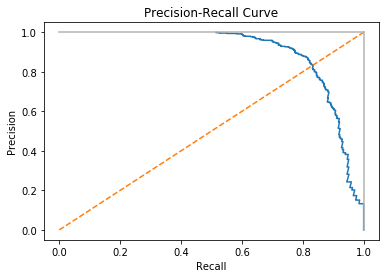

In [67]:
# precision_recall_curve 함수로 임계점마다 정밀도와 재현율을 계산하여 정밀도-재현율 곡선 제작
from sklearn.metrics import precision_recall_curve

# 진짜 양성 비율과 거짓 양성 비율 계산
precision, recall, threshold = precision_recall_curve(
    target_test, target_probabilities
)

# ROC 곡선 제작
plt.title("Precision-Recall Curve")
plt.plot(precision, recall)
plt.plot([0,1], ls="--") # 가장 최악의결과입니다.
plt.plot([1, 1], c=".7"), plt.plot([1,1], [1,0], c=".7") # 이 부분은 모두 이어버려서 하나의 직선을 만들어서, 가장 좋은 선을 보여준다.
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.show()

In [68]:
# 이 곡선의 아래 면적 : 평균 정밀도
from sklearn.metrics import average_precision_score

# 평균 정밀도 계산
average_precision_score(target_test, target_probabilities)

0.8984128719848977

In [69]:
# 교차 검증 함수의 scoring 파라미터 활용(ROCAUC, 평균 정밀도)
cross_validate(logit, features, target, scoring=["roc_auc", "average_precision"])

{'fit_time': array([0.00849724, 0.00698137, 0.00498652, 0.00698185, 0.00598407]),
 'score_time': array([0.00199389, 0.00099707, 0.00199485, 0.00099683, 0.0009973 ]),
 'test_roc_auc': array([0.9007689, 0.918251 , 0.90882  , 0.915359 , 0.90261  ]),
 'test_average_precision': array([0.90028629, 0.90967443, 0.90296471, 0.91135611, 0.88797021])}

## 11.6 다중클래스 분류기 예측 평가하기

In [72]:
# 두 개 이상의 클래스를 다룰 수 있는 평가 지표로 교차검증을 수행
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# 특성 행렬과 타깃 벡터 제작
features, target = make_classification(
    n_samples=10000,
    n_features=3,
    n_informative=3,
    n_redundant=0,
    n_classes=3,
    random_state=1
)

# 로지스틱 회귀 모델 제작
logit = LogisticRegression()

# 정확도를 사용하여 교차검증 수행
cross_val_score(logit, features, target, scoring="accuracy")

array([0.841 , 0.829 , 0.8265, 0.8155, 0.82  ])

In [73]:
# 마크로 평균 F1 점수를 사용하여 교차검증 수행
cross_val_score(logit, features, target, scoring="f1_macro")

array([0.84061272, 0.82895312, 0.82625661, 0.81515121, 0.81992692])

## 11.7 분류기 성능 시각화하기

* 오차 행렬(confusion matrix)로 예측 클래스와 진짜 클래스 비교

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

# 데이터 로드합니다.
iris = datasets.load_iris()

# 특성 행렬 제작
features = iris.data

# 타깃 벡터 제작
target = iris.target

# 클래스 이름의 리스트 제작
class_names = iris.target_names

# 훈련 세트와 테스트 세트 제작
features_train, features_test, target_train, target_test = train_test_split(
    features, target, random_state=1
)

# 로지스틱 회귀 모델을 만듭니다.
classifier = LogisticRegression()

# 모델을 훈련하고 예측 결과를 계산
target_predicted = classifier.fit(features_train,
target_train).predict(features_test)

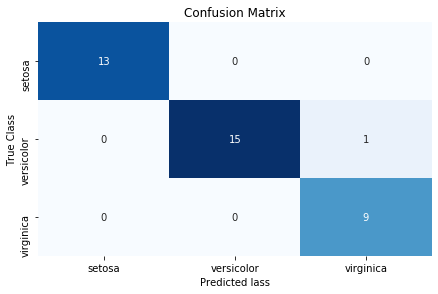

In [83]:
# 오차 행렬 제작
matrix = confusion_matrix(target_test, target_predicted)

# 판다스 데이터프레임 제작
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

# 히트맵 제작
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted lass")
plt.show()

* 오차 행렬 : 분류기의 성능을 쉽고 효과적으로 보여준다.
    * 해석이 용이하다.
    * 행렬의 열 : 예측 클래스, 행렬의 행 : 실제 클래스를 보여준다.

In [84]:
from sklearn.metrics import confusion_matrix

confusion_matrix(target_test, target_predicted)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

## 11.8 회귀 모델 평가하기
* 평균 제곱 오차(MSE)를 활용한다.

In [97]:
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


# 특성 행렬과 타깃 벡터 제작
features, target = make_regression(
    n_samples=100,
    n_features = 3,
    n_informative=3,
    n_targets=1,
    noise=50,
    coef=False,
    random_state=1)

# 선형 회귀 모델 제작
ols = LinearRegression()

# 음의 MSE 활용한 교차검증 수행
cross_val_score(ols, features, target, scoring='neg_mean_squared_error')


array([-1974.65337976, -2004.54137625, -3935.19355723, -1060.04361386,
       -1598.74104702])

In [95]:
# R2 사용한 교차검증 수행
cross_val_score(ols, features, target, scoring='r2')

array([0.8622399 , 0.85838075, 0.74723548, 0.91354743, 0.84469331])

$$\text{MSE} = {1 \over n} {\sum_{i=1}^n (\hat{y}_i - y_i)^2}$$

* 음의 MSE 사용 이유 : 사이킷런의 scoring 파라미터는 높은 값이 좋은 것으로 여기므로, 마이너스를 붙여 생각하게 한다.

* $R^2$: 널리 쓰는 다른 회귀 평가 지표 : 모델이 설명하는 타깃 벡터의 분산 측정

## 11.9 군집 모델 평가하기
* 데이터를 클러스터로 모으고자 비지도 학습 알고리즘 활용할 때 그 평가방법

In [100]:
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 특성 행렬을 생성한다.
features, _ = make_blobs(n_samples= 1000,
n_features= 10,
centers=2,
cluster_std=0.5,
shuffle=True,
random_state=1)

# k-평균으로 데이터를 클러스터링하고 클래스 예측
model = KMeans(n_clusters=2, random_state=1).fit(features)

# 예측된 클래스
target_predicted = model.labels_

# 모델을 평가한다.
silhouette_score(features, target_predicted)

0.8916265564072142

$$s_i = {{b_i - a_i} \over {\text{max}(a_i,b_i)}}$$

* 모든 샘플의 실루엣 계수를 평균한 값 : 계수가 -1에서 1 사이이며, 1은 조밀하고 잘 구분되는 클러스터를 의미한다.
* 1이 좋다.

## 11.10 사용자 정의 평가 지표 만들기
* make_scorer 함수로 스코어 함수로 변환한다.(scorer function)

In [3]:
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression

# 특성 행렬과 타깃 벡터 제작
features, target = make_regression(n_samples=100,
n_features=3,
random_state=1)

# 훈련 세트와 테스트 세트 제작
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size = 0.10, random_state=1
)

# 사용자 정의 지표 제작
def custom_metric(target_test, target_predicted):
    r2 = r2_score(target_test, target_predicted)

    # R2 점수 반환
    return r2
# 높은 점수가 좋은 것을 나타내는 스코어 함수 제작
score = make_scorer(custom_metric, greater_is_better=True)

# 리지(ridge) 회귀 모델 제작
classifier = Ridge()

# 리지 회귀 모델 훈련
model = classifier.fit(features_train, target_train)

# 사용자 정의 스코어 함수 적용
score(model, features_test, target_test)

0.9997906102882058

In [4]:
# 예측 실전 상황이라면 직접 만들어볼 수 있겠다.
target_predicted = model.predict(features_test)

# R2 점수 계산
r2_score(target_test, target_predicted)

0.9997906102882058

## 11.11 훈련 세트 크기에 따른 영향을 시각화하기

* 학습 곡선 그리기

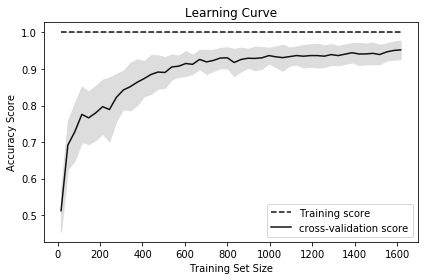

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

# 데이터 로드
digits = load_digits()

# 특성 행렬과 타깃 벡터 제작
featuers, target = digits.data, digits.target

# 다양한 훈련 세트 크기에서 교차검증 훈련 점수와 테스트 점수 계산
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(),
                                                        features,
                                                        target,
                                                        cv=10,
                                                        scoring='accuracy',
                                                        n_jobs=-1,
                                                        train_sizes=np.linspace(
                                                        0.01,
                                                        1.0,
                                                        50))
# 훈련 세트 점수의 평균과 표준편차 계산
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# 테스트 세트의 점수 평균과 표준편차 계산
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# 그래프 그리기
plt.plot(train_sizes, train_mean, '--', color='#111111',
label="Training score")
plt.plot(train_sizes, test_mean, color="#111111",
label="cross-validation score")

# 표준편차 영역 그리기
plt.fill_between(train_sizes, train_mean - train_std,
train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std,
test_mean + test_std, color="#DDDDDD")

# 그래프 출력
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"),
plt.legend(loc="best")
plt.tight_layout()
plt.show()

## 11.12 평가 지표 리포트 만들기
* 사이킷런의 classification_report 사용

In [15]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 데이터 로드
iris = datasets.load_iris()

features = iris.data

target = iris.target

class_names = iris.target_names

features_train, features_test, target_train, target_test = train_test_split(
    features, target, random_state=1
)

classifier = LogisticRegression()

model = classifier.fit(features_train, target_train)
target_predicted= model.predict(features_test)

# 분류 리포트
print(classification_report(target_test,
target_predicted,
target_names=class_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



## 11.13 하이퍼파라미터 값의 영향을 시각화하기
* 검증 곡선(validation curve) 그리기

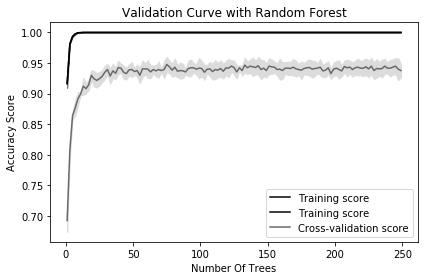

In [27]:
import matplotlib.pyplot as pyplot
import numpy as np
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

# 특성 행렬과 타깃 벡터를 만든다.
features, target = digits.data, digits.target

# 파라미터 값의 범위 제작
param_range = np.arange(1, 250, 2)

# 파라미터 값의 범위를 사용하여 훈련 세트와 테스트 세트의 정확도 계산
train_scores, test_scores = validation_curve(
    RandomForestClassifier(),
    features,
    target,
    param_name="n_estimators",
    param_range = param_range,
    cv=3,
    scoring="accuracy",
    n_jobs=-1
)

# 훈련 세트 점수의 평균과 표준편차 계산
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# 훈련 세트와 테스트 세트의 평균 정확도 점수를 그래프로 그리기
plt.plot(param_range, train_mean, label="Training score", color="black")

# 훈련 세트와 테스트 세트의 평균 정확도 점수를 그래프로 그리기
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

#훈련 세트와 테스트 세트의 정확도에 대한 표준편차를 그래프로 그리기

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# 그래프 출력
plt.title("Validation Curve with Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

* 대부분의 훈련 알고리즘에는 훈련 과정을 시작하기 전에 선택해야만 하는 하이퍼파라미터가 있다.
    * 랜덤 포레스트 분류기 : 결정 트리의 앙상블을 제작한다.